* 원본커널 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# Contents of the Notebook

## Part 1. EDA:

(1) Analysis of the features


(2) Finding any relations or trends considering multiple features

## Part 2. Feature Engineering and Data Cleansing:

(1) Adding any few features


(2) Removing redundant features


(3) Converting features into suitable form for modeling

## Part 3. Predictive Modeling

(1) Running Basic Algorithms.


(2) Cross Validation


(3) Ensembling


(4) Important Features Extraction

------------------------------------------------------------------------------------------

# Part 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## 데이터 읽기
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 데이터의 크기
data.shape

(891, 12)

891행(891명)에 대한 12개 특징들에 대한 데이터가 들어 있다.

In [5]:
## checking for total null values 
## null 값이 있는지 체크하기
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* The Age, Cabin, and Embarked have null values. I will try to fix them.
* Age, Cabin, Embarked 세 컬럼에 null 값이 존재하며, 데이터를 분석하며 수정작업이 필요함

## How many Survived? (생존자의 수 확인)

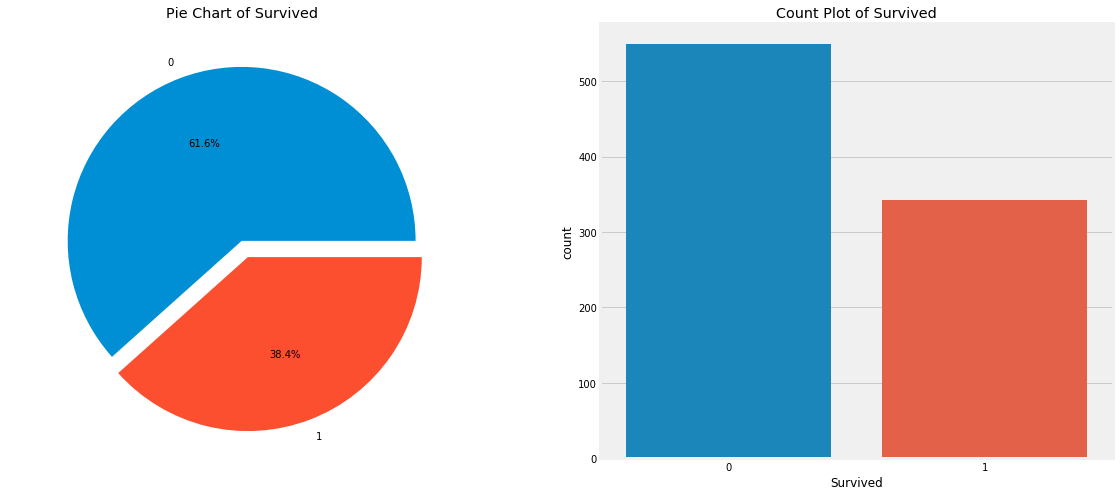

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode =[0, 0.1], autopct = '%1.1f%%', ax=ax[0])
ax[0].set_title('Pie Chart of Survived')
ax[0].set_ylabel(' ')

sns.countplot(data=data,
                      x = 'Survived',
                      ax=ax[1])
ax[1].set_title('Count Plot of Survived')
plt.show()

It is evident that not many passengers survived from the accident.

- 많은 사람들이 이 사고로 부터 생존하지 못했습니다.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

- training set의 891명 생존 자 중 약 350명(38.4%)만이 생존했습니다. 데이터를 더 살펴봐서 어떤 특성의 탑승자가 생존했고, 사망했는지 확인해보겠습니다.

We will try to check the survival rate by using different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.

- 데이터셋의 여러 다른 feature(Sex, Embarked)들을 사용하여 생존률을 체크해보겠습니다.

First, let us understand the different types of features.

- 먼저 feature들의 여러 타입에 대해 알아봅시다.

## Type of Features

### Categorical Features:

* A categorical variable is one that two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also know as Nominal Variables.


  - Categorical Variable 은 두 개 이상의 카테고리 값을 가지고 있는 feature로 각 관측값들이 이 카테고리 값들로 분류가 됩니다. 타이타닉 케이스에서는 gender가 두개의 카테고리를 가진 categorical variable 입니다. 이런 변수에 대해서는 따로 순서를 매길 수 없습니다. 다른 말로 Nominal Variables이라고도 불립니다.


* Ordinal Features in the dataset : Sex, Embarked

### Ordinal Features: 

* An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting betweer the values. For example, if we have a feature like Height with values Tall, Medium, Short, then Height is an ordinal varibles. Here we can have a relative sort in the variables

Ordinal Variable은 categorical value와 비슷하지만 각 값들이 순서를 가진다는 점에서 다름. 가령 Tall, Medium, Short라는 값을 가진 Height라는 feature가 있다면 이것 또한 ordinal variable로 볼 수 있음.

* Ordinal Features in the dataset : Pclass





### Continuous Feature:

* A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.

두 지점 혹은 최초 최댓값 사이에 어떤 값이든 취할 수 있으면 그 변수는 continuous

* Continuous Features in the dataset: Age

## Analysing the Features

### Sex --> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex: Survived vs Sex')

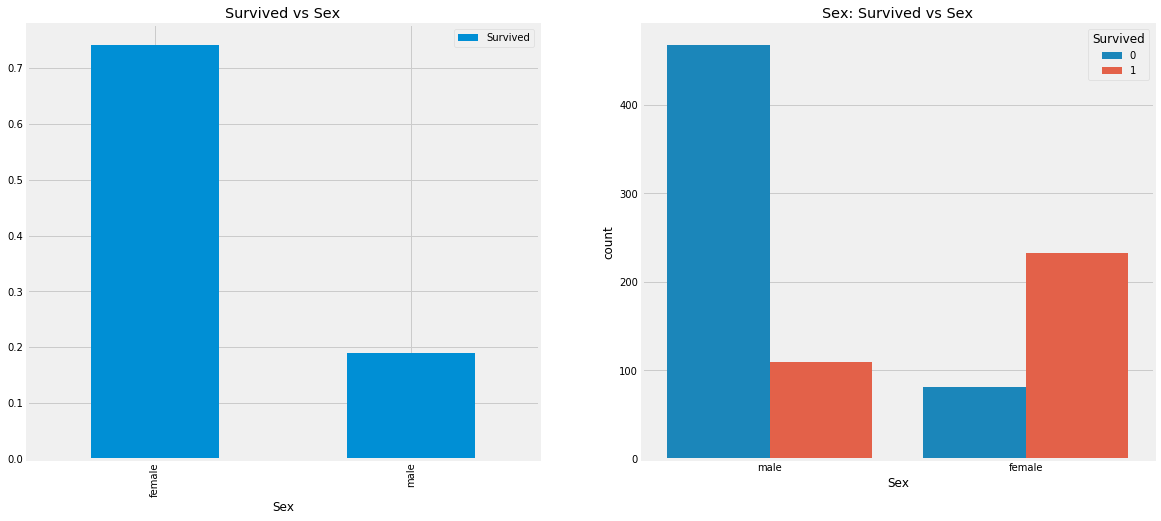

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', data=data, hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Sex')

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.The survival rate for women on the ship is around 75% while that for men is around 18-19%.


타이타닉호에 승선한 남성의 수는 여성의 수에 비해 훨씬 많습니다. 하지만 생존한 여성의 수가 남성의 수에 비해 두배 가량은 많습니다. 여성의 생존률은 약 75% 정도이고 남성의 경우 18~19% 정도입니다.


This looks to be a very important feature for modeling. But is it the best?? Let's check other features.

이것은 모델링에 매우 중요한 feature가 될 것으로 보입니다.

### Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [10]:
data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.02, 'Pclass: Survived vs Dead')

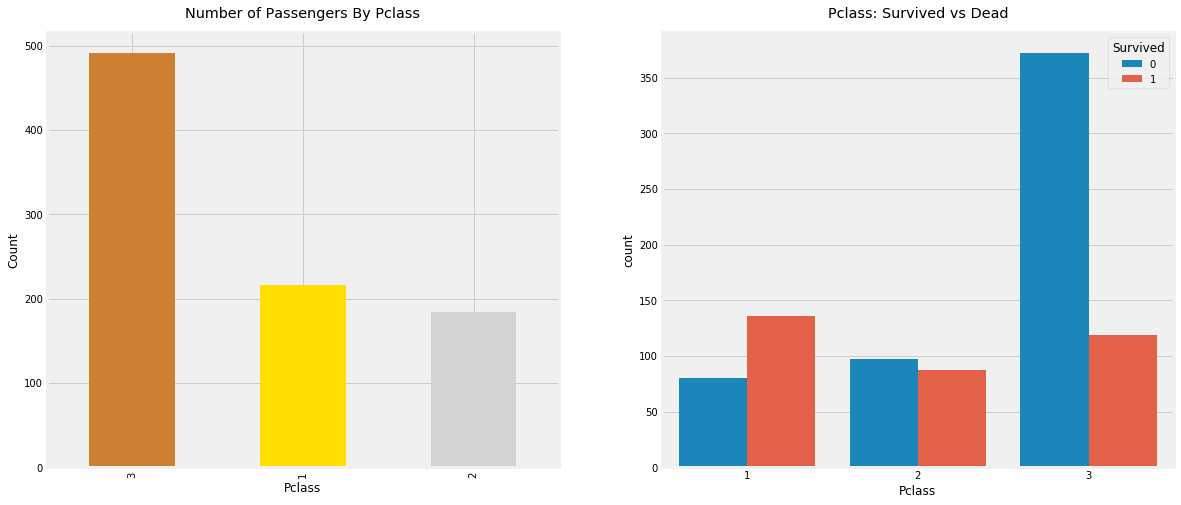

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y= 1.02)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Pclass')

sns.countplot(data=data,
                     x='Pclass',
                     hue='Survived',
                    ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=1.02)

People say Money Can't Buy Everything. But we can clearly see that Passengers of Pclass1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

흔히 돈으로 모든걸 살수 없다곤 하지만 Pclass1의 승객들이 구조에 훨씬 높은 우선순위에 있었던 것으로 보인다. Pclass3의 승객들이 훨씬 많이 탑승했지만, 생존자의 수는 매우 적고, 생존률은 25% 정도이다.


For Pclass 1, % of survived is around 63%, while for Pclass 2 is around 47%. So money and status matters. Such a realistic world.

Pclass 1의 생존률은 63% 수준이고, Pclass 2의 생존률은 47% 수준이다. 재력과 지위가 중요함을 보여준다.


Let's dive in little bit more and check for other interesting observations. Let's check survival rate with Sex and Pclass together.

조금더 파고들어, Sex와 Pclass를 함께 고려한 생존률을 살펴보자.

In [12]:
pd.crosstab([data['Sex'], data['Pclass']], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

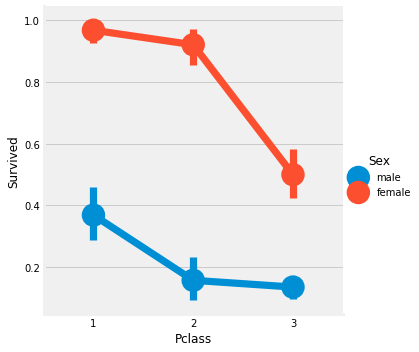

In [13]:
sns.factorplot(data=data, x='Pclass', y='Survived', hue='Sex')
plt.show()

We use factorplot in this case, because they make the seperation of categorical values easy.

categorical value를 쉽게 분할해서 보기 위해 factorplot을 사용했습니다.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass 1 is about 95~96%, as only 3 out of 94 womem from Pclass 1 died.

Crosstab과 FactorPlot을 보면 Pclass1의 여성들이 94명중 3명만이 사망하며 95~96%의 생존률을 기록했습니다.

It is evident that irrespective of Pclass , Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.

그리고 Pclass와 무관하게 여성이 구조에 우선되었음을 알 수 있습니다. 남성의 경우 Pclass 1에 탑승했음에도 매우 낮은 생존률을 기록했습니다.

Looks like Pclass is also an important feature. Let's analyze other features.

Pclass 또한 중요한 feature로 보이며 다른 feature들을 분석해보도록 합시다.

### Age --> Continuous Feature

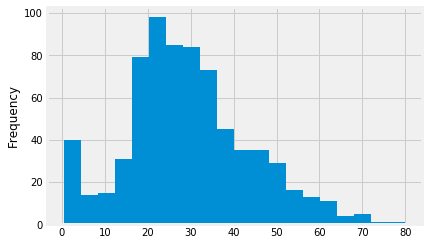

In [14]:
data['Age'].plot(kind='hist', bins=20)

In [15]:
print('Oldest Passenger was of {} Years'.format(data['Age'].max()))
print('Youngest Passenger was of {} Years'.format(data['Age'].min()))
print('Average Age on the ship was of {:.2f} Years'.format(data['Age'].mean()))

Oldest Passenger was of 80.0 Years
Youngest Passenger was of 0.42 Years
Average Age on the ship was of 29.70 Years


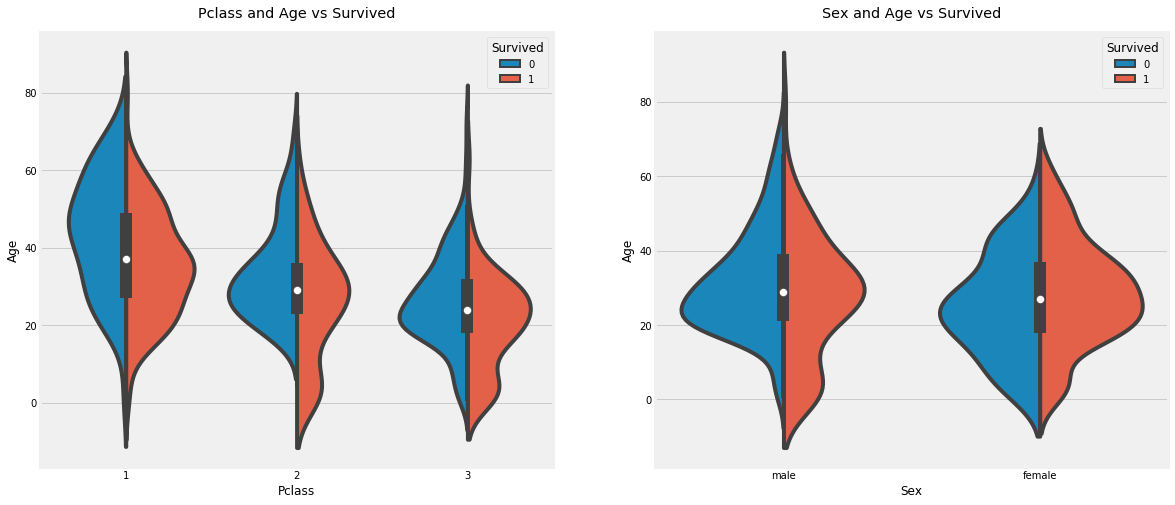

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=data, x='Pclass', y= 'Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived', y=1.02)

sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived', y=1.02)
plt.show()

#### Observations: 

1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e. children) looks to be good irrespective of the Pclass

  어린이의 수는 Pclass 가 높아짐(1등급 --> 3등급)에 따라 증가하고, 10세 이하의 탑승객의 생존률은 Pclass에 관계없이 양호한 것으로 보인다.
  
2) Survival chances for Passengers aged 20-50 from Pclass 1 is high and is even better for Women.

  Pclass 1의 20~50세 탑승객의 생존률은 높은 편이고, 여성보다도 좋은 모습을 보인다.
  
3) For males, the survival chances decreases with an increase in age.

 남성은 연령이 증가함에 따라 생존률이 감소한다.


As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

Age는 177개의 Null value가 있는데 이것을 채우기 위해 데이터셋의 평균연령을 사용할 수 있음.


But the problem is, there were many people with many different ages. We just can assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?

문제는 많은 사람들이 많은 다양한 연령을 가지고 있다는 것이다. 우리는 4살 아이에게 29세 연령을 부여할 수도 있습니다. 각 탑승객이 어떤 연령층에 있는지 알 수 있는지 알 수 있는 방법이 없을까?

We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

각 이름은 Mr, Mrs와 같은 salutation을 가지고 있음. 이런 Mr와 Mrs의 평균 연령을 적용할 수 있습니다.

#### What's in a name?? --> Feature

In [17]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.') # salutation 뽑아내기

Okay so here we are using the Regex: ```([A-Za-z]+). ``` 

So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot).
So we successfully extract the Initials from the Name.

정규표현식 ```([A-Za-z]+). ``` 를 활용해서 이름에서 알파벳과 그 다음에 dot이 오는 문자열을 찾아 추출해서 Initial 필드에 채웠습니다.

In [18]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

Miss를 나타내는 Mlle나 Mme 와 같은 값들이 존재하는데 이런 것들은 Miss로 변경하고, 다른 Initial들에 대해서도 비슷한 작업을 하겠습니다.

In [19]:
data['Initial'].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady" ,"Major", "Master", "Miss", "Mlle", "Mme", "Mr", "Mrs", "Ms", "Rev", "Sir"],
                                ["Mr", "Other", "Mrs", "Mr", "Mr", "Other", "Mrs" ,"Mr", "Master", "Miss", "Miss", "Miss", "Mr", "Mrs", "Miss", "Other", "Mr"], inplace=True)

In [20]:
data.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Fill NaN Ages

In [21]:
## Assigning the NaN values with the Ceil values of the mean ages
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'), 'Age'] = 46

In [22]:
data['Age'].isnull().any()

False

Age에 있는 모든 Null 값을 채워줬습니다.

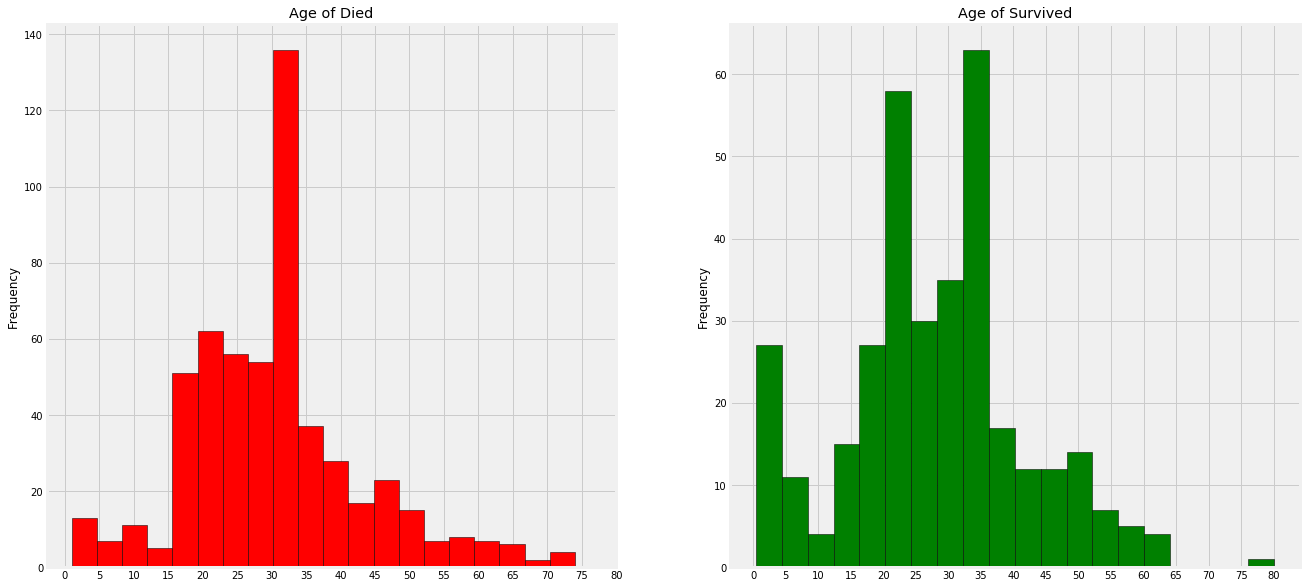

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

data[data['Survived']==0]['Age'].plot.hist(ax=ax[0], bins = 20, edgecolor = 'black', color='red')
ax[0].set_title('Age of Died')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1]['Age'].plot.hist(ax=ax[1], bins = 20, edgecolor='black', color ='green')
ax[1].set_title('Age of Survived')
ax[1].set_xticks(x1)
plt.show()

#### Observations

1) The toddlers(age<5) were saved in large numbers(The women and Child First Policy)
 
   5세 이하의 어린이들이 많이 구조되었습니다.(여성과 아이 우선주의()

2) The oldest Passenger was saved(80 years)
 
  80세의 최고령 탑승객도 구조되었습니다.
 
3) Maximium number of death were in the age group of 30-40

 30~40대의 탑승객이 가장 많이 사망했습니다.

### Embarked --> Categorical Value

In [24]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port of Embarkation

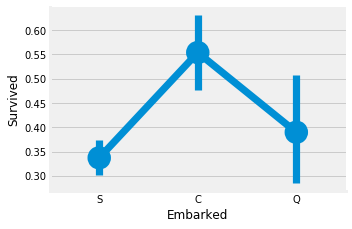

In [25]:
sns.factorplot(data=data, x='Embarked', y='Survived')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Porc C is highest around 0.55 while it is lowest for S

C에서 탑승한 사람의 생존 확률이 0.55 가량으로 가장 높고 S에서 탑승한 사람의 생존률이 가장 낮다.

Text(0.5, 1.02, 'Embarked vs Pclass')

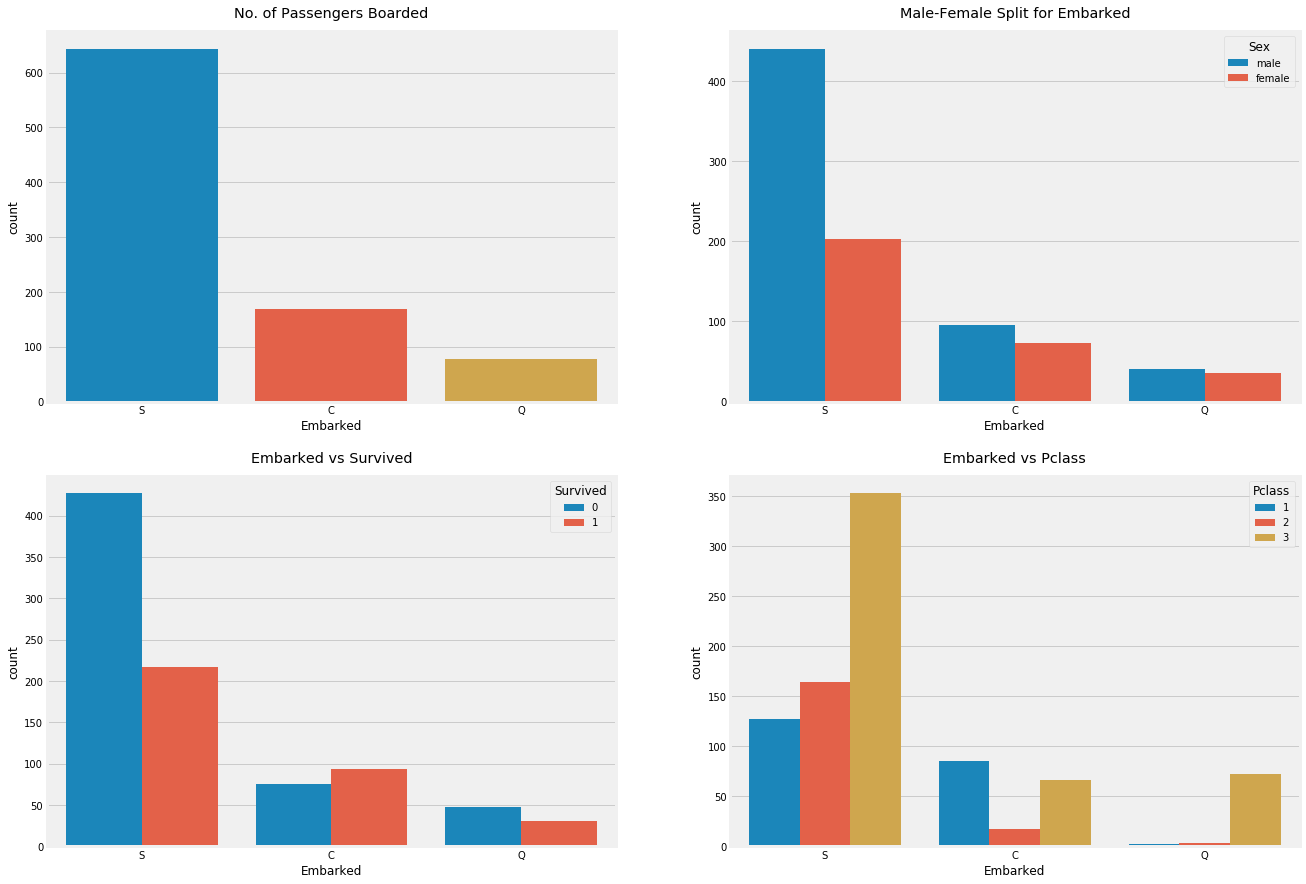

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=data, x= 'Embarked', ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded', y = 1.02)

sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked', y = 1.02)

sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived', y=1.02)

sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass', y=1.02)

#### Observations: 

1) Maximum passengeres boarded from S. Majority of them being from Pclass 3.

   - S로부터 가장 많은 승객이 탑승했고, 그들의 다수를 Pclass 3가 차지하고 있음.
   
2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 Passengers.

   - C에서 탑승한 승객들의 생존률이 높아 운이 좋은 것으로 보인다. 그 이유는 아마 구조된 승객의 대부분이 Pclass 1 과 Pclass 2의 승객이기 때문일 것이다.
   
3) The Embark S looks to the port from where majority of the rich people boarded. Stil the chances for survival is low here, that is because many passengers from P class 3 around 81% didn't survived.

   - S는 가장 많은 부자 탑승객이 탑승한 항구로 보인다. 하지만 S의 탑승객 생존률은 낮은데, 이것은 많은 승객들이 Pclass 3의 탑승객이었고 81% 가량이 사망했다.
   
4) Port Q had almost 95% of the passengers were from Pclass 3.

   - Port Q는 95%에 가까운 대부분의 탑승객이 Pclass3였다.

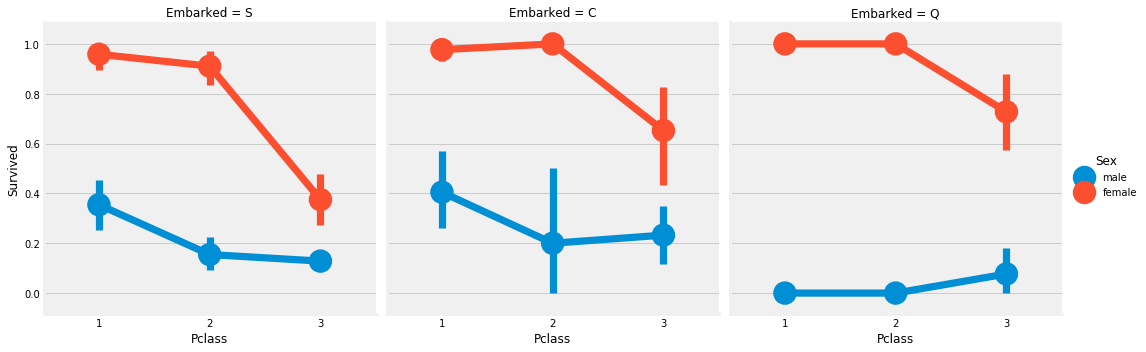

In [27]:
sns.factorplot(data=data, x = 'Pclass', y= 'Survived', col = 'Embarked', hue = 'Sex')
plt.show()

#### Observations : 

1) The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of Embarked

   - Embarked와는 관계없이 Pclass 1과 Pclass 2의 여성 탑승객의 생존률은 거의 1에 가깝다.
   
2) Port S looks to be very unlucky for Pclass 3 Passengers as the survival rate for both men and women is very low (Money Matters)

   - 남성과 여성의 생존률이 모두 낮은 Port S Pclass 3 탑승객은 운이 없어보인다.(사실은 재력이 중요함)
   
3) Port Q looks to be.unlukciest for Men, as almost all were from Pclass 3

   - Port Q에서 남성들에게 운이 좋지 않았는데, 그들 대부분은 Pclass 3 탑승객이었기 때문이다.

#### Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S

대부분의 탑승객이 S에서 탑승했기 때문에, NaN값을 S로 채웁니다.

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
data['Embarked'].isnull().any() # Finally No NaN values

False

### SibSp --> Discrete Feature

This feature represents whether a person is alone or with his siblings and spouses.

이 feature는 탑승객이 혼자인지, 형제자매 및 배우자와 함께 탔는지 나타냅니다.

In [30]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


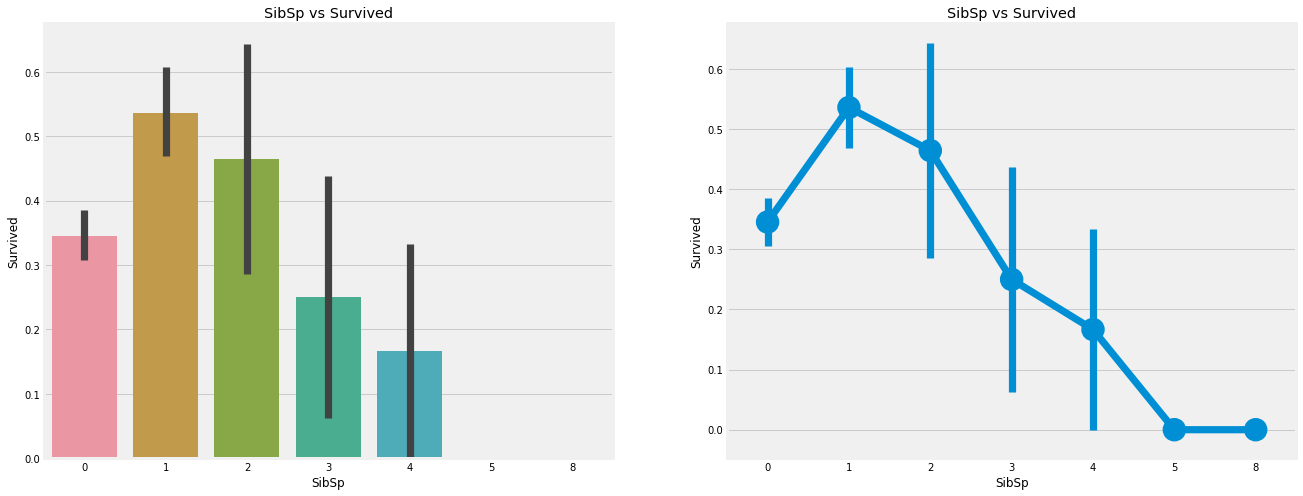

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [32]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations: 

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

  - barplot 과 factorplot은 홀로 탑승한 승객의 생존률이 34.5% 가량 됨을 보여줍니다. 가족의 수가 늘어날 수록 그래프는 아래로 점차 꺾입니다. 가족이 있으면 아무래도 자신보다 가족을 살리려 할 것이기 때문에 그럴 듯 해보입니다. 하지만 놀랍게도 가족이 5~8명되는 경우에는 생존률이 0%입니다. 아마 Pclass 때문일까요?

The reasopn is Pclass. The crosstab shows that Person with SibSp > 3 were all in Pclass 3. It is eminent that all the large families in Pclass 3 died.

  - crosstab 그래프를 보면 SibSp가 3보다 큰 경우에는 모두 Pclass 3에 속해 있음을 알 수 있습니다. 왜 많은 수의 가족이 탄 모두가 사망했는지가 명확해집니다.

### Parch 

In [33]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass 3.

위 도표에서 많은 가족과 탑승한 승객의 대부분은 Pclass 3 탑승객임을 알 수 있습니다.

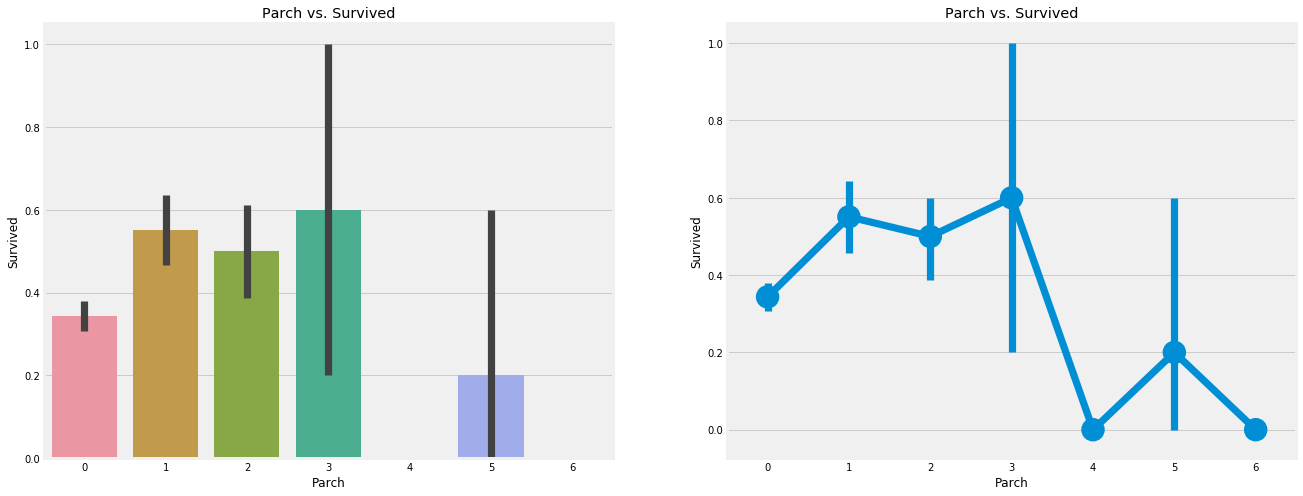

In [34]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.factorplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.close(2)
plt.show()

#### Observations : 

Here too the results are quite similar. Passengers with their parents and kids have greater chance of survival. It however reduces as the number goes up.

- Parch의 경우 SibSp와 비슷한 결과가 나옵니다. 부모와 아이와 함께 탑승한 사람의 경우 생존률이 높습니다. 하지만 또 그 수가 늘어나면 다시 감소하게 됩니다.

The chances of survival is good for somebody who has 1-3 parents or kids on the ship. Being alone also proves to be fatal and the chances for survival decreased when somebody has >4 parents on  the ship.

 - 1~3명의 부모,아이와 함께 있는 탑승객은 생존률이 높습니다. 혼자있는 경우 생존률이 낮으며, 가족이 4명이상 되는 경우 생존률이 또한 낮습니다.

### Fare --> Continuous Feature

In [35]:
print('Highest Fare was {}'.format(data['Fare'].max()))
print('Lowest Fare was {}'.format(data['Fare'].min()))
print('Average Fare was {}'.format(data['Fare'].mean()))

Highest Fare was 512.3292
Lowest Fare was 0.0
Average Fare was 32.2042079685746


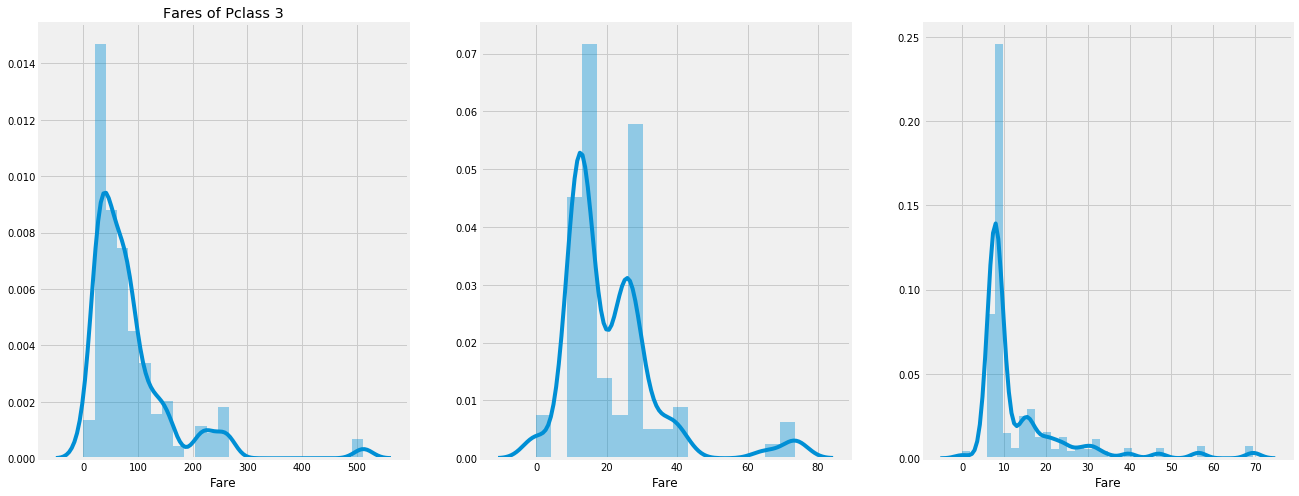

In [36]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title('Fares of Pclass 1')

sns.distplot(data[data['Pclass']==2]['Fare'], ax=ax[1])
ax[0].set_title('Fares of Pclass 2')

sns.distplot(data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[0].set_title('Fares of Pclass 3')

plt.show()

There looks to be a large distribution in the fares in Pclass 1 and this distributuin goes on decreasing as the standard reduces. As this is also continuous, we can convert into discrete values by using binning.

 - Pclass 1에서 요금 분포가 넓게 퍼져있는 것으로 보입니다. 그리고 등급이 올라갈 수록 그 정도는 줄어듭니다. Fare 는 Continuous 하기 때문에 우리는 이 Feature를 binning을 이용하여 discrete value로 변경할 수 있습니다.

## Observations in a Nutshell for all features:

- Sex: The chance of survival for women is high as compared to men.

 
      * Sex : 여성의 생존률이 남성에 비해 높습니다. 
  

- Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

  
      * Pclass : Pclass 1의 탑승객이 생존률이 높다는 것은 자명합니다. Pclass 3의 생존률은 매우 낮습니다. 여성의 경우 Pclass1 , Pclass2의 생존률은 거의 1에 가깝습니다.


- Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.


      * Age : 5~10세이하의 어린이들은 생존확률이 높습니다. 15~35세의 탑승객은 많이 사망했습니다.


- Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.


      * Embarked : C에서 탑승한 경우 생존률은 꽤 높습니다. 많은 사람들이 Pclass 1에서 탑승했기 때문입니다.  Q에서 탑승한 경우 대부분은 Pclass 3였고, 생존률이 낮습니다.


- Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.


      * Parch+SibSp: 1~2명의 형제자매,배우자, 1~3명의 부모,아이가 있는 탑승객의 경우 혼자 탑승한 경우보다 생존률이 높습니다.  

## Correlation Between the Features

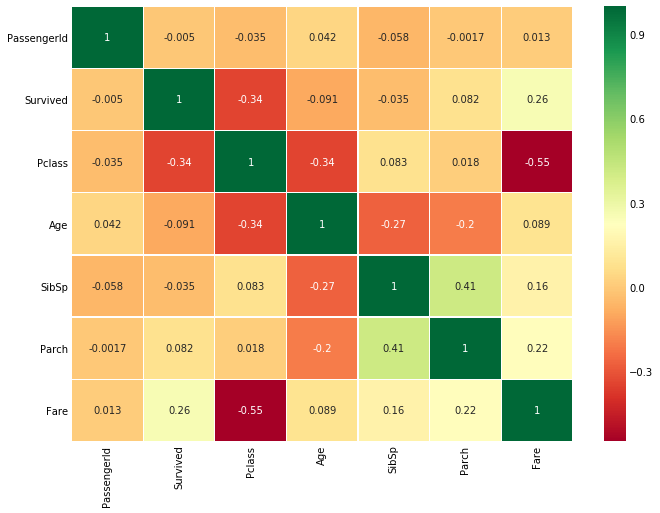

In [37]:
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidths=0.2, cmap='RdYlGn')
fig  = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Interpreting The Heatmap

The first thing to note is that only the numerical features are compared as it is obvious that we cannot correlate between the alphabets or strings. Befoe understanding the plot, let us see what exactily correlation is.

 - numerical feature만 비교될 수 있음. 문자열은 비교할 수가 없음

Positive Correlation : If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

- feature A의 값 증가가 feature B의 값 증가를 불러온다면 양의 상관관계가 있다고 한다. 1인 경우 완전 양의 상관관계

Negative Correlation : if an increase in feature A leads to decrease in feature B, then tey are negatively correlated. A value -1 means perfect negative correlation.
 
  - feature A의 값 증가가 feature B의 값 감소를 불러옩다면 음의 상관관계가 있다고 한다. -1인 경우 완전 음의 상관관계

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

 - 두 feature가 아주 높게 양의 상관관계를 가진다고 할 때, 어느 한 값의 증가는 다른 값의 증가를 가져옵니다. 이거는 그 feature들이 매우 비슷한 정보를 가지고 있다는 것을 의미하며, information의 분산이 거의 없다는 것입니다. 이것은 그 변수들간의 다중공선성으로 알려져있습니다.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

 - redundant한 이런 feature를 둘 다 사용해야할까? 모델을 만들고 학습하는데 우리는 redundant한 feature는 제거를 할 것입니다. 이는 학습시간이 줄어드는 등 여러 장점이 있습니다.

# Part 2. Feature Engineering and Data Cleansing

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

* 데이터셋이 주어졌을 때 모든 feature들이 꼭 중요한 것은 아니다. 일부 redundant한 feature들은 제거되어야한다. 또한, 다른 feature로부터 정보를 추출하여 다른 feature를 추가할 수도 있습니다.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

 * 그 예가 Name으로부터 Initial Feature를 뽑아낸 것입니다. 새로운 feature를 더하거나 feature를 제거할 수 있는지 살펴봅시다. 그리고 예측모델링에 쓰기 좋은 형태로 feature를 변형도 할 것 입니다.

## Age Band

### Problems with Age Features

As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

* 연령은 continuous feature이기 때문에 머신러닝모델에서의 문제가 존재합니다.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

* 가령, 운동선수를 성별로 그룹을 나눌 때, 우리는 쉽게 남성과 여성으로 나눌 수 있습니다.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

* 하지만 연령으로 그룹을 나눌 때 어떻게 해야할까요? 30명이 있을 때 30개의 다른 연령 값이 있을 것입니다. 이게 문제입니다.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

* 우리는 binning과 normalization을 통해  continuois value를 categorical value로 바꿀 필요가 있습니다. 이번에는 binning을 사용하여 age group을 나눌 것입니다.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

* 최고 연령이 80세 입니다. 연령을 0부터 80으로 해서 5개의 그룹으로 나눠봅시다. 하나의 그룹의 사이즈는 16이 될 것입니다.

In [38]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[ (data['Age'] > 16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[ (data['Age'] > 32) & (data['Age']<=48), 'Age_band'] =2
data.loc[ (data['Age'] > 48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[ (data['Age'] > 64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
data['Age_band'].value_counts().sort_index().to_frame().style.background_gradient(cmap='summer_r')
## 각 연령 그룹의 탑승객 수를 체크

,Age_band
0,104
1,382
2,325
3,69
4,11


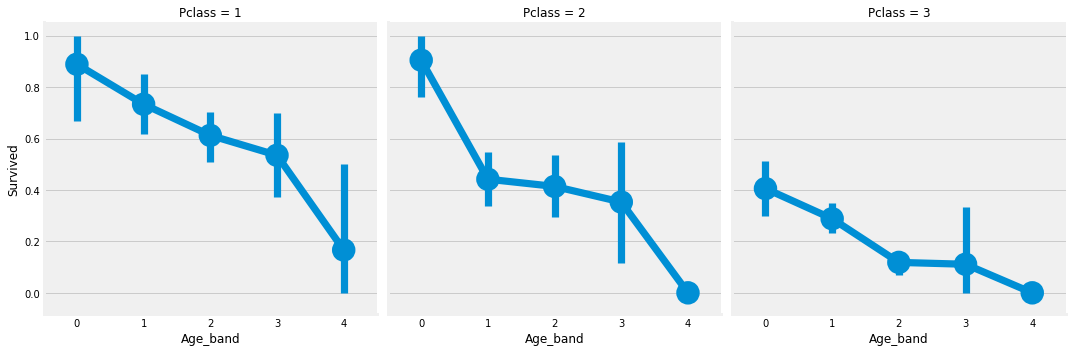

In [40]:
sns.factorplot(data=data, x='Age_band', y='Survived', col='Pclass')

True that the survival rate decreases as the age incereases irrespective of the Pclass

* Pclass에 관계없이 연령이 증가할 수록 생존률이 낮아짐을 볼 수 있습니다.

## Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or no

* 이번에는 Family_size와 Alone이라는 새로운 feature를 만들것입니다. 이것들은 Parch와 SibSp 의 정보가 요약된 feature입니다. 이 feautre들을 통해 우리는 가족의 크기와 생존률이 관련이 있는지를 체크해볼 것입니다. 

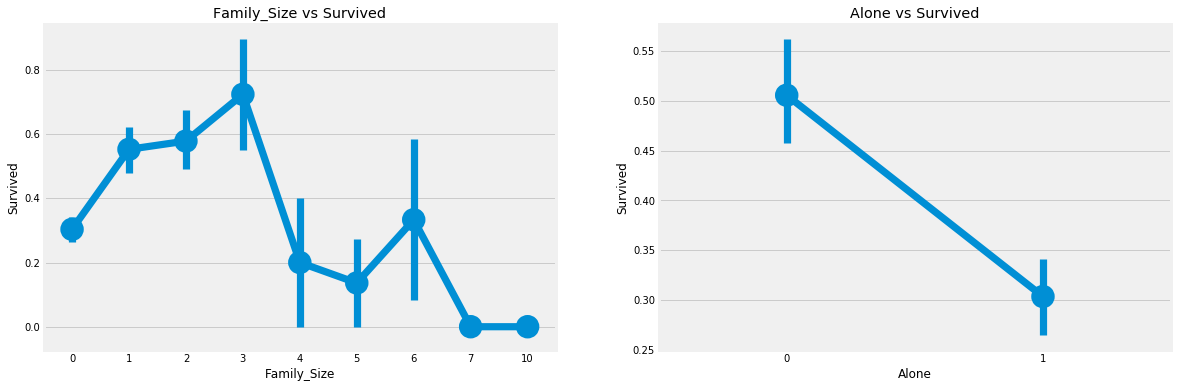

In [41]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] ## family size
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize = (18, 6))

sns.factorplot(data=data, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot(data=data, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

* Family_Size가 0이거나 alone = 1 일 때, 생존률은 매우 낮습니다. Family_Size가 4를 넘을 때 생존률이 또한 떨어집니다. 모델을 만들 때 중요한 feature로 보입니다.

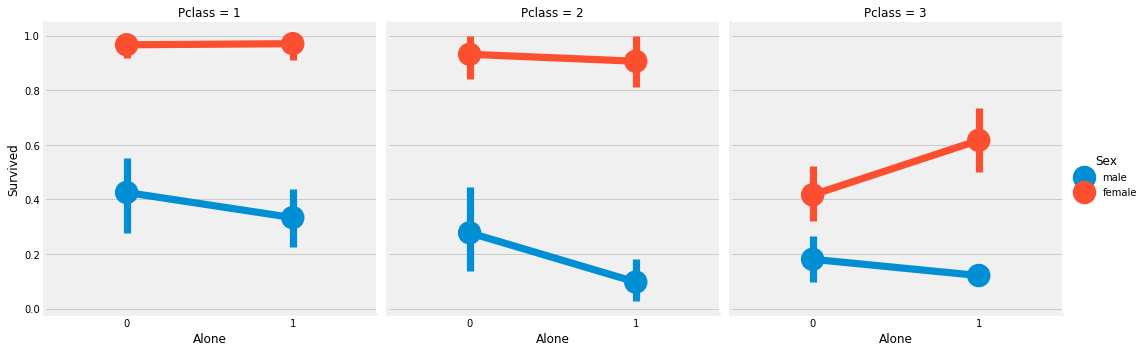

In [42]:
sns.factorplot(data=data, x='Alone', y='Survived', hue='Sex', col='Pclass')

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

 * Pclass 3을 제외하고는 성별과 Pclass와 무관하게 혼자 탑승한 사람이 위험하다는 것이 분명해보입니다.

## Fare_Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

* Fare도 continuous feature인데 이번에는 qcut을 사용해서 ordinal value로 변환시킬 것입니다. 

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

* qcut은 우리가 입력시킨 number of bins에 따라 데이터를 분할합니다. 우리는 이번에 5개의 bins를 입력하면, 5개로 나뉘어진 각각의 값들이 나올 것입니다.


In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

* Fare 증가에 따라 생존률 또한 증가하는 것을 볼 수 있습니다.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

* Fare_Range를 이대로 모델에 쓸 수 없기 때문에, Age_band처럼 하나의 숫자 값으로 변환해야합니다.

In [44]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

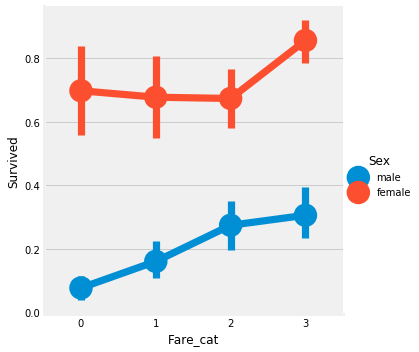

In [45]:
sns.factorplot(data=data, x='Fare_cat', y='Survived', hue='Sex')

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

* Fare_cat이 증가함에 따라 생존률 또한 증가하는 경향을 보입니다. 성별과 함께 중요한 feature가 될 것으로 보입니다.

## Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

* 우리는 문자열을 머신러닝 모델에 넣을 수 없기 때문엔 Sex, Embarked 등을 숫자로 변환해주어야 합니다.

In [46]:
data['Sex'].replace(['male','female'],[0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

### Dropping Unneeded Feature

* Name --> We don't need name feature as it cannot be converted into any categorical value.
   - Categorical value로 바꿔줄 수 없으므로 필요없습니다.
   
   
* Age --> We have the Age_band feature, so no need of this
  - Age_cat이 있으므로 필요 없습니다.
  

* Ticket --> It is any random string that cannot be categorised
  - categorised 될수 없는 무작위 문자열이므로 필요 없습니다.
  

* Fare --> We have the Fare_cat feature, so unneeded
  - Fare_cat이 있으므로 필요 없습니다. 
  
 
* Cabin --> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature
  - NaN 값이 많을 뿐더러, 많은 승객들이 복수의 cabin을 가지고 있습니다. 그렇기 때문에 필요없는 feature입니다.
  

* Fare_Range --> We have the fare_cat feature.
  - fare_cat 이 많으므로 필요 없습니다.

* PassengerID --> Cannot be categorised
  - categorised 될 수 없으므로 필요 없습니다.

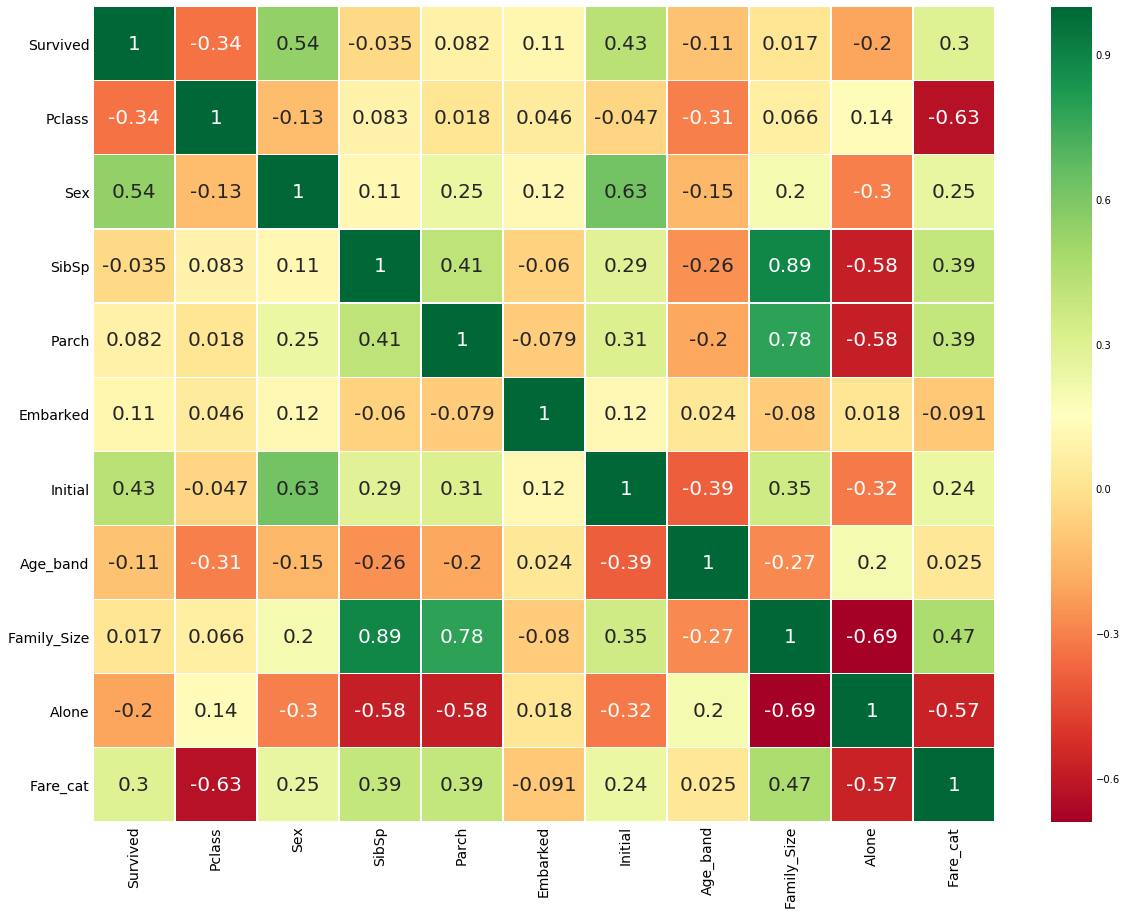

In [47]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1,inplace =True)

sns.heatmap(data.corr(), annot=True, linewidths=0.2, cmap='RdYlGn', annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of the being SibSp and FamilySize and Parch and FamilySize and some negative ones like alone and FamilySize

    * correlation plot을 보면 SibSp, Parch와 Family_Size의 양의 상관관계가 높음을 볼 수 있습니다. 반대로 Alone과 Family_Size는 음의 상관관계가 높습니다.

# Part 3.Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:


* EDA를 통해 인사이트르 얻었지만 그것만으로는 우리는 승객의 생존여부를 정확히 예측할 수 없습니다. 우리는 몇 훌륭한 분류기 알고리즘을 통해 탑승객의 생존여부를 예측할 것입니다. 아래의 알고리즘들을 모델을 만들 때 사용할 것입니다.


1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [48]:
# importing all the required ML packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

* train_test_split(arrays, test_size, train_size,random_state, shuffle, stratify)
 
 (1) Parameter
 - arrays : 분할시킬 데이터를 입력( Python List, Numpy array, Pandas Dataframe)
 - test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
 - train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size 의 나머지)
 - random_state : 데이터 분할 시 셔플이 이루어지는데 이를 위한 시드값(int나 RandomState로 입력)
 - shuffle : 분할 전 데이터 섞기(셔플 여부) 설정 (default = True)
 - stratifiy :지정한 데이터의 비율을 유지, 가령 Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify = Y로 설정하면 분할된 데이터셋의 0과 1 비율도 25%, 75% 로 유지되어 분할
 
 (2) Return
 - X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 모두 넣었을 경우의 반환
 - X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

In [49]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['Survived'], random_state = 0)
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [50]:
model = svm.SVC(kernel='rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rfb-SVM is {:.6f}%'.format(100*metrics.accuracy_score(prediction1, test_Y)))

Accuracy for rfb-SVM is 83.582090%


## Linear Support Vector Machine(linear-SVM)

In [51]:
model = svm.SVC(kernel='linear', C=0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear-SVM is {:.6f}%'.format(100*metrics.accuracy_score(prediction2, test_Y)))

Accuracy for linear-SVM is 81.716418%


## Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is {:.6f}%'.format(100*metrics.accuracy_score(prediction3, test_Y)))

Accuracy for Logistic Regression is 81.716418%


## Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is {:.6f}%'.format(100*metrics.accuracy_score(prediction4, test_Y)))

Accuracy for Decision Tree is 80.597015%


## K-Nearest Neighbours(KNN)

In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is {:.6f}%'.format(100*metrics.accuracy_score(prediction5, test_Y)))

Accuracy for KNN is 83.208955%


* Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Let's check the accuracies over various values of n_neighbours.
 
 KNN 모델의 정확도는 n_neighbours 파라미터의 값에 따라 변합니다. 기본 값은 5입니다. 이 값을 변경시키면서 모델의 정확도가 어떻게 변하는지 알아봅시다.

In [55]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

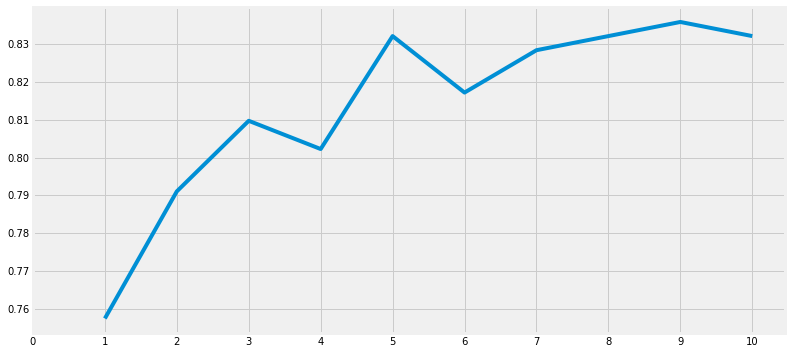

Accuracy for different vlaues of n are : [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [56]:
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for different vlaues of n are :', a.values, 'with the max value as ', a.values.max())

## Gaussian Naive Bayes

In [57]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for the NaiveBayes is {:.6f}%'.format(100*metrics.accuracy_score(prediction6, test_Y)))

Accuracy for the NaiveBayes is 81.343284%


## Random Forests

In [58]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for the Random Forests is {:.6f}%'.format(100*metrics.accuracy_score(prediction7, test_Y)))

Accuracy for the Random Forests is 81.343284%


* The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

모델의 정확도가 분류기가 robust한 정도를 결정짓는 유일한 변수는 아니다. 한 분류기가 훈련 데이터셋을 학습하고 테스트셋에 대해 정확도가 90%였다고 하자.

* Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

분류가의 정확도가 매우 좋아보여도, 그게 새로운 테스트 셋이 주어졌을 떄도 90%를 기록할 수 있을까요? 그렇지 않습니다. 왜냐하면 분류기가 학습할 모든 개체를 우리가 정할 수 없기 때문입니다. 훈련셋과 테스트셋이 바뀌면서 정확도 또한 변합니다. 증가할 수도 있고, 감소할 수도 있는데 이것을 우리는 model variance라고 합니다.

* To overcome this and get a generalized model,we use Cross Validation.

이 점을 극복하기 위해 우리는 Cross Validation을 사용합니다.

## Cross Validation

* Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

많은 경우에 data들은 imbalanced 합니다, 가령 class 1에는 각 개체의 수가 엄청 많지만 다른 클래스에는 객체의 수가 적을 수 있습니다. 그러므로 우리는 데이터셋 각각의 개체에 대해 우리의 알고리즘을 훈련시키고 테스트 해야합니다. 그리고 나서 데이터셋의 정확도의 평균을 이용할 수 있습니다.

* 1) The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
   
   K-Fold Cross Validation은 데이터 셋을 k개의 서브셋으로 나눕니다.
   
   
* 2)  Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts. 

  데이터셋을 5개로 나누었을 때 우리는 1개의 서브셋을 테스트용으로 나머지 4개를 훈련용으로 둡니다.
  
 
* 3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

  각각의 시행마다 테스트 셋을 바꿔주고 나머지 셋에 훈련을 시키는 프로세스를 수행합니다. 정확도와 에러는 평균 값을 취하게 됩니다. 
 
 
* This is called K-Fold Cross Validation.

 이것이 K-Fold Cross Validation 입니다.
 
 
* 4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

알고리즘은 데이터셋에 따라 underfit할 수도 있고 overfit할 수도 있습니다. 때문에 우리는 cross-validation을 통해 일반화된 모델을 얻을 수 있습니다.

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state = 22)
xyz = []
accuracy = []
std = []
classifier = ['Linear SVB','Radial SVM', 'Logistics Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
                 DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]

for i in models :
    model  = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [60]:
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'CV std' : std}, index = classifier)
new_models_dataframe2

,CV Mean,CV std
Linear SVB,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistics Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.807004,0.030123
Naive Bayes,0.801386,0.028999
Random Forest,0.805905,0.035752


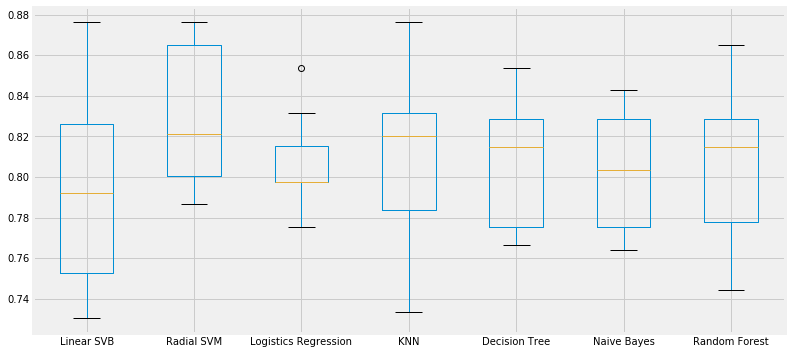

In [61]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifier)
box.T.boxplot()

* The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

분류 정확도는 imbalance 문제 때문에 오해를 부를 수 있다. 우리는 요약된 결과를 혼동행렬을 통해 얻을 수 있다. 혼동행렬은 어디서 모델이 잘못됐는지, 어떤 클래스를 모델이 잘못 예측했는지 알려준다.

## Confusion Matrix

It gives the number of correct and incorrect classifications made by classifier.

혼동행렬은 분류기에 의해 분류된 정확한 분류, 정확하지 못한 분류의 수를 알려줍니다.

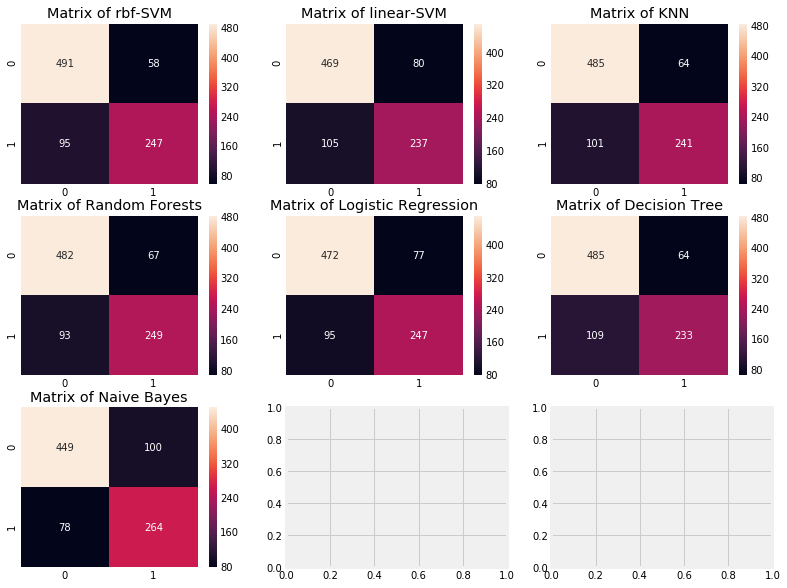

In [62]:
f, ax = plt.subplots(3, 3 , figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix of rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix of linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix of KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix of Random Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix of Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix of Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix of Naive Bayes')

plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.show()

#### Interpreting Confusion Matrix

* The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

우하향 대각선은 정확히 예측한 수를, 좌하향 대각선은 잘못 예측한 수를 보여준다. 처음 plot인 rbf-SVM을 보자.

1) The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

정확히 예측한 수는 사망자 491 + 생존자 247명 으로 평균 CV 정확도는 (491+247) / 891 = 82.8% 이다.



2) Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

사망한 사람을 생존했다고 예측한 것은 5명, 생존한 사람을 사망했다고 예측한 것은 95명이다. 사망 예측에서 더 많은 잘못된 예측이 있었다.

* By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

혼동해렬들을 보면 rbf-SVM 모델이 사망자를 정확히 예측할 확률이 가장 높습니다. 생존자를 예측하는데는 Naive Bayes 가 가장 ㄷ좋은 결과를 얻었습니다.

## Hyper-Parameters Tuning

* The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

머신러닝 모델은 블랙박스 같습니다. 모델에는 몇몇 기본 파라미터 값들이 있는데, 우리는 이것을 조금 튜닝하거나 바꿔줌으로써 더 좋은 모델을 얻을 수 있습니다. SVM 모델의 C와 gamma처럼 각각의 분류기에는 유사하지만 다른 파라미터들이 존재하고 이것들을 hyper parameter라고 합니다. 우리는 알고리즘 learning rate를 높이고, 더 좋은 모델을 얻기 위해 이것들을 조금 조절해줄 것입니다. 이것을 Hyper-Parameters Tunning 이라고 합니다.

* We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

SVM과 Random Forests의 hyper parameter를 튜닝해보겠습니다.

### SVM

In [63]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = { 'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.3s finished


### Random Forests

In [64]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   11.4s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


* The best score for Rbf-Svm is 82.82% with C=0.05 and gamma=0.1. For RandomForest, score is abt 81.8% with n_estimators=900.

rbm_SVM 모델은 C = 0.5, gamma = 0.1 일때 82.82%로 가장 높은 점수를 얻었습니다. RandomForest에서는 n_estimators 가 900일 때 81.8%로 가장 높은 점수를 얻었습니다.

# Ensembling

* Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

앙상블은 모델의 정확도, 퍼포먼스를 높이기 위한 좋은 방법입니다. 간단히 말하면 여러개의 간단한 모델의 조합으로 하나의 강력한 모델을 만드는 것입니다.

* Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

우리가 폰을 구매하기를 원하고, 폰 구매에 대해 다양한 파라미터를 기반으로 많은 사람들에게 질문을 한다고 가정해봅시다. 그러면 우리는 각각 다른 파라미터를 분석한 뒤에 한 product에 대한 강한 판단을 만들어 낼 수 있습니다. 이것이 앙상블입니다. 앙상블은 모델의 stability(안정성)을 높여줍니다. 앙상블은 아래와 같은 방법으로 수행될 수 있습니다.

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

* It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

Voting Classifier는 많고 다른 종류의 심플한 여러 머신 로닝 모델의 예측을 합치는 방법입니다. 이 방법은 각 서브모델의 예측을 기반으로 평균적인 예측값을 만들어냅니다. 각각의 서브모델 또는 베이스모델은 전부 다른 종류입니다. 

In [76]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

In [77]:
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237660310974917


## Bagging

* Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

Bagging은 일반적인 앙상블 방법입니다. Bagging은 데이터 셋의 작은 부분에 대해 유사한 분류기를 적용한 다음 모든 예측값의 평균을 취합니다. 평균화를 통해 분산이 줄어들게 됩니다. Voting Classifier와는 달리 Bagging은 유사한 분류기를 사용합니다.

### Bagged KNN

* Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

Bagging은 분산이 높은 모델에 잘 작용합니다. 그 예가 Decision Tree와 Random Forest입니다. 우리는 작은 n_neighbors 값을 가진 KNN을 n_neighbors의 작은 값처럼 사용할 수 있습니다.

In [79]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for Bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for baggged KNN is: ', result.mean())

The accuracy for Bagged KNN is:  0.8208955223880597
The cross validated score for baggged KNN is:  0.8137654636250142


### Bagged DecisionTree

In [80]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')
print('Thre cross validated score for bagged Decision Tree is: ',result.mean())

The accuracy for bagged Decision Tree is:  0.8246268656716418
Thre cross validated score for bagged Decision Tree is:  0.8204826353421859


## Boosting

* Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

Boosting은 순차적인 분류기 학습을 사용하는 앙상블 기법입니다. 약한 모델의 순차적인 향상이 이루어집니다. Boosting은 다음과 같이 작동합니다.

* A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

하나의 모델을 전체 데이터 셋에 대해 훈련시킵니다. 그 모델은 어떤 값(instance)는 맞게, 어떤 값는 틀리게 예측했을 것입니다. 다음 번 수행에서는, 틀리게 예측된 값에 대해 포커스를 더욱 맞춰서, 더 많은 비중을 줄 것입니다. 틀리게 예측됐던 값을 정확하게 예측하려고 시도합니다. 이런 반복적인 프로세스가 계속되고, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가됩니다.

### AdaBoost(Adaptive Boosting)

* The weak learner or estimator in this case is a Decision Tree. But we can change the dafault base_estimator to any algorithm of our choice.

이번 케이스에서 가장 약한 learner/ estimator는 Decision Tree 입니다. 하지만 우리는 default base_estimator를 우리가 선택한 다른 알고리즘으로 변경할 수 있습니다.

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249526160481218


### Stochastinc Gradient Boosting

* Here too the weak learner is a Decision Tree.

여기에서도 weak learner는 Decision Tree입니다.


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8182862331176939


### XGBoost

In [83]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8104710021563954


* We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

AdaBoost에서 가장 높은 정확도를 얻었습니다. 이 정확도를 Hyper-Parameter Tuning을 통해 높여봅시다.

### Hyper-Parameter Tuning for AdaBoost

In [84]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.1min finished


* The maximum accuracy we can get with AdaBoost is 83.16% with n_estimators=200 and learning_rate=0.05

n_estimator= 200, learning_rate = 0.05 일 때, AdaBoost로 얻은 가장 높은 정확도 83.16%를 얻었습니다.

### Hyper-Parameter Tuning for GradientBoost

In [101]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8237934904601572
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.7min finished


### Hyper-Parameter Tuning for XgBoost

In [104]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator=xg.XGBClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8226711560044894
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.4min finished


### Confusion Matrix for the Best Model

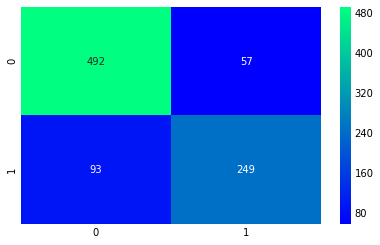

In [85]:
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance 

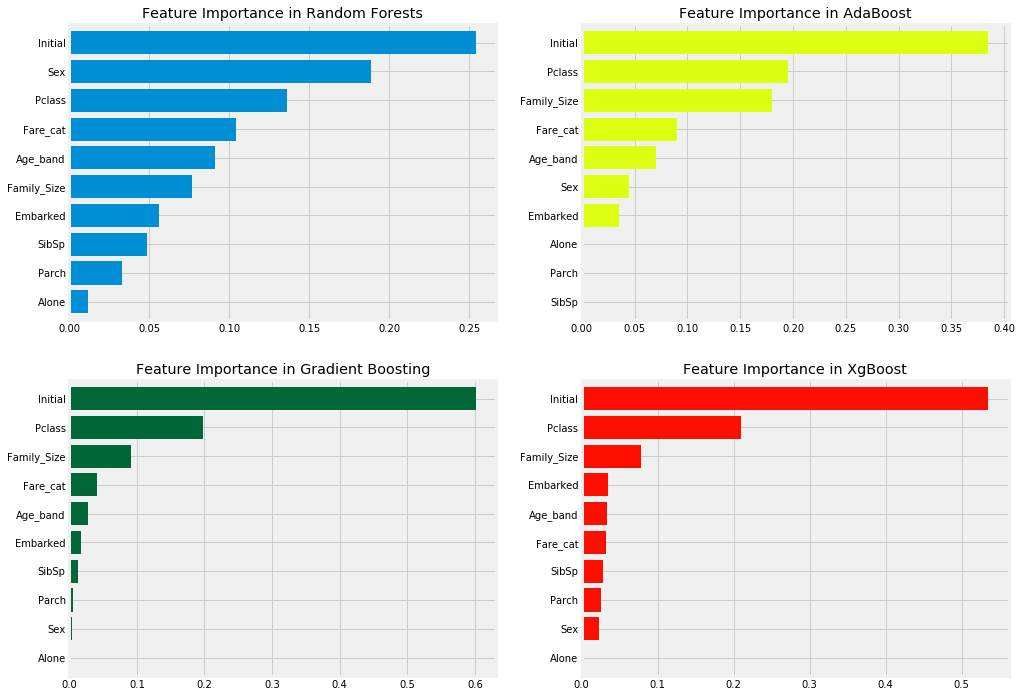

In [105]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators= 500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=100, random_state = 0, learning_rate = 0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=100, learning_rate =0.8)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color ='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

* We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

다양한 분류기들의 important feature를 볼 수 있습니다.

#### Observations

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

 공통적으로 중요한 feature는 Initial, Fare_cat, Pclass, Family_Size 등 입니다.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.


However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

Sex는 중요하지 않은 것처럼 보입니다. 앞에서 Pclass와 함께 봤을 때 중요한 factor로 보였던 것에 반해 놀라운 결과입니다. Sex는 Random Forest 에서만 중요한 것으로 보입니다.


그러나, 모든 분류기에서 제일 중요한 것으로 분류된 Initial을 봅시다. Sex와 Initial은 양의 상관관계가 있었습니다. 결국 성별에 대한 정보도 담고 있습니다.


3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

Pclass와 Fare_cat은 승객의 지위, Family_Size(Alone, Parch, SibSp)를 참조합니다.

-------------------------------------------------------------------------------------------------

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are: 1) For R:Divide and Conquer by Oscar Takeshita

2)For Python:Pytanic by Heads and Tails

3)For Python:Introduction to Ensembling/Stacking by Anisotropic

Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.